<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import pandas_ta as ta
import talib
import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'bb_anti_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:
from config.dicts_params import dict_custos, dict_valor_lot, dict_path

# Cenários

In [5]:
# 5 min - win'
{'sl': 1486, 'tp': 1134, 'BB_LENGTH': 10, 'STD': 1.84}
{'sl': 2471, 'tp': 1438, 'BB_LENGTH': 8, 'STD': 1.80}
{'sl': 1650, 'tp': 1480, 'BB_LENGTH': 9, 'STD': 1.45}

# 5 min - wdo
{'sl': 29, 'tp': 27, 'BB_LENGTH': 9, 'STD': 1.2114296789710028}
{'sl': 12, 'tp': 11, 'BB_LENGTH': 7, 'STD': 1.405428218011036}

params = {'sl': 10.0,
 'tp': 3.0,
 'BB_LENGTH': 8,
 'STD': 1.58} # 16h

In [6]:
params = {'sl': 280, 'tp': 1800, 'BB_LENGTH': 8, 'STD': 1.80}
params = {'sl': 8, 'tp': 15, 'BB_LENGTH': 7, 'STD': 1.405428218011036}

In [29]:
params = {'sl': 12, 'tp': 20, 'BB_LENGTH': 7, 'STD': 1.41}
params = {'sl': 10.00919937189865,
 'tp': 35.900633352764395,
 'BB_LENGTH': 6,
 'STD': 1.2158255052618194}

In [30]:
# Configurar o backtester
sym = 'WIN@N'
sym = 'WSP@N'
#sym = 'BIT@N'
#sym = 'WDO@N'
#sym = 'EURJPY'
#sym = 'GBPJPY'
#sym = 'USDJPY'

bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini='2019-01-01',
    data_fim='2025-06-30',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1.0,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)

# Parâmetros da estratégia RSI
BB_LENGTH = params['BB_LENGTH']
STD = params['STD']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "bb_length": BB_LENGTH,
        "std": STD,
        'allowed_hours': [9,10,11,12,13,14,15,16,17],
        #'allowed_hours': [16],
        'position_type':'long'
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WSP@N
Timeframe: t5
Período: 2019-01-01 a 2025-06-30

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $44644.01
Retorno Total: $14644.01 (48.81%)
Retorno Anualizado: 8.38%
Volatilidade Anualizada: 10.14%

--- DRAWDOWN ---
Drawdown Máximo: 12.92%
Drawdown Máximo (Valor): $5114.36
Tempo Máximo em Drawdown: 32594.0 períodos
Tempo em Drawdown: 94.67% do total

--- TRADES ---
Total de Trades: 14056
Trades Vencedores: 5298 (37.69%)
Trades Perdedores: 8758 (62.31%)
Saídas por TP: 9.84%
Saídas por SL: 52.33%
Saídas por Tempo: 37.83%

--- RATIOS ---
Sharpe Ratio: 0.826
Sortino Ratio: 1.701
Calmar Ratio: 0.649
Profit Factor: 1.069

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $42.65
Perda Média: $24.13
Win/Loss Ratio: 1.77
Expectancy: $1.04


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

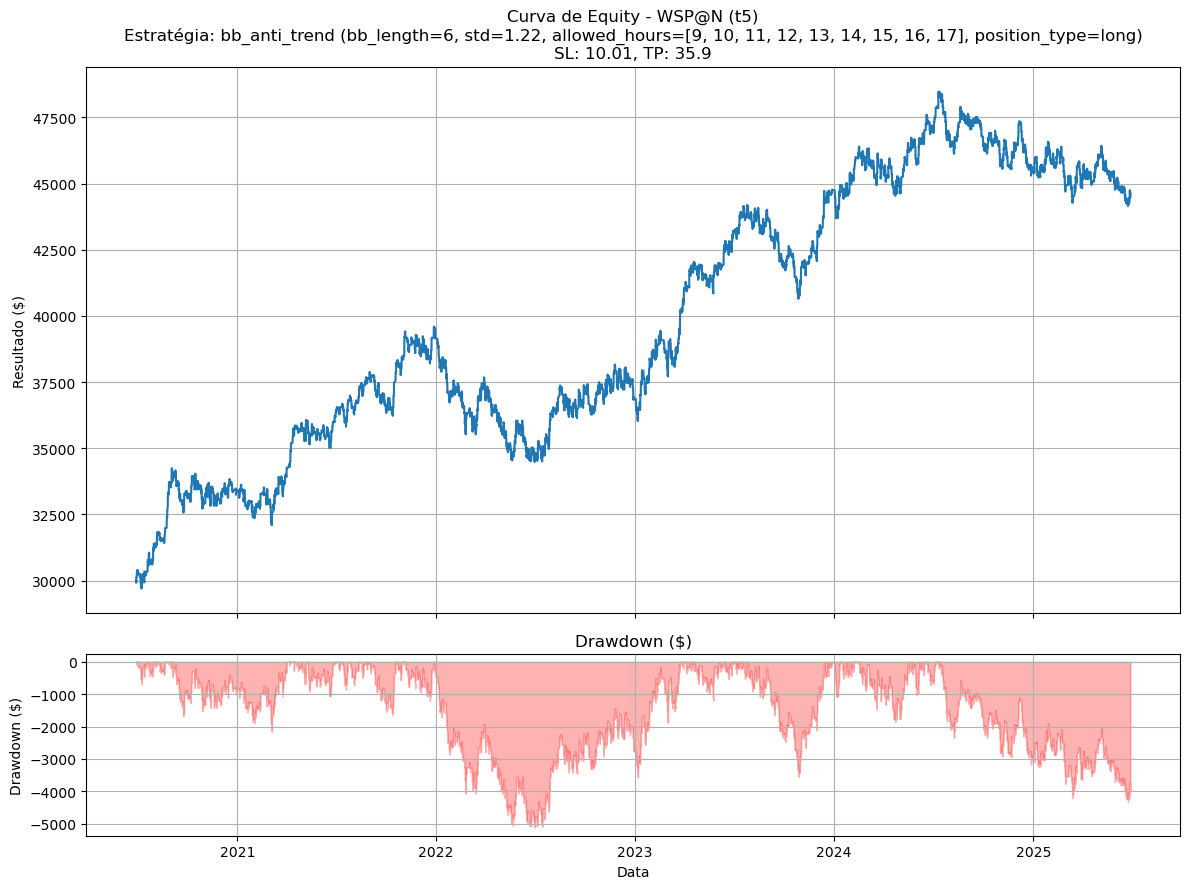

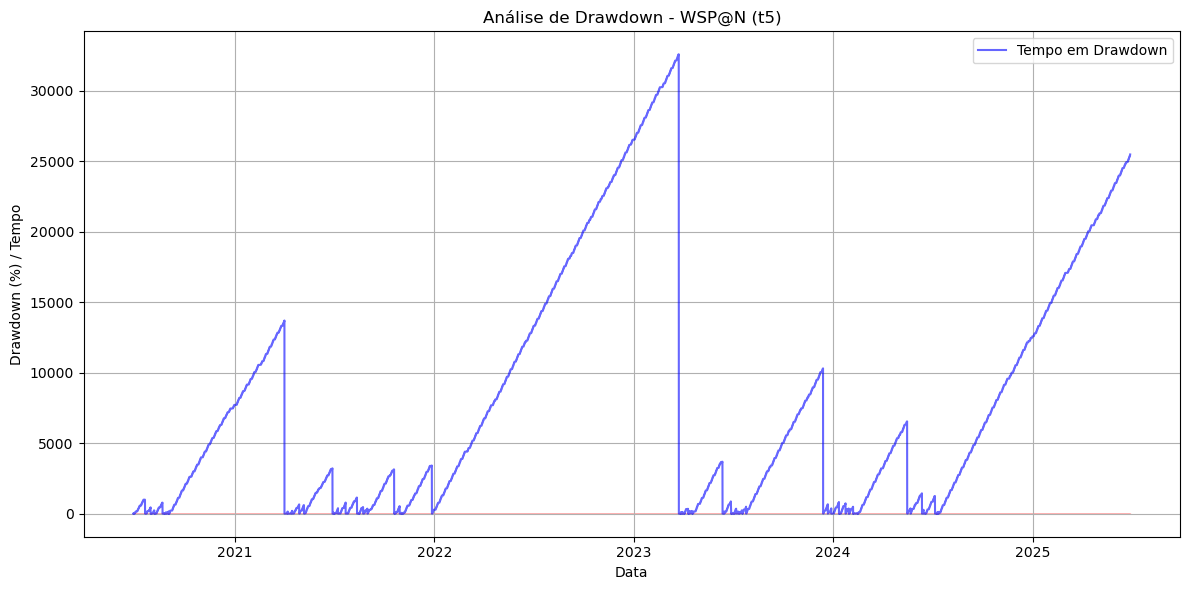

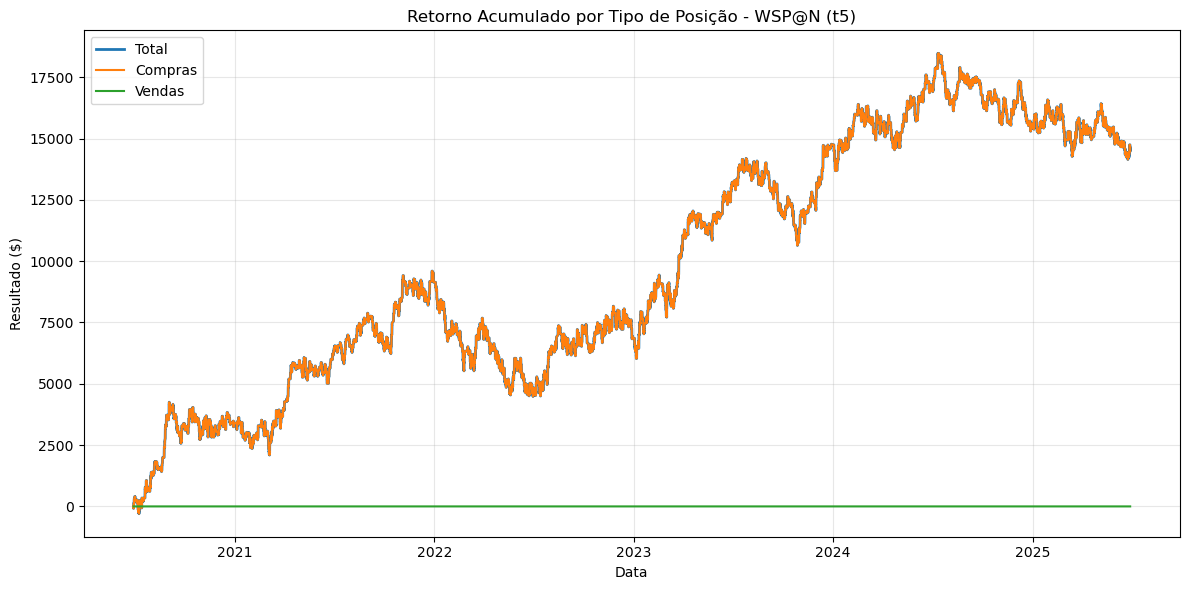

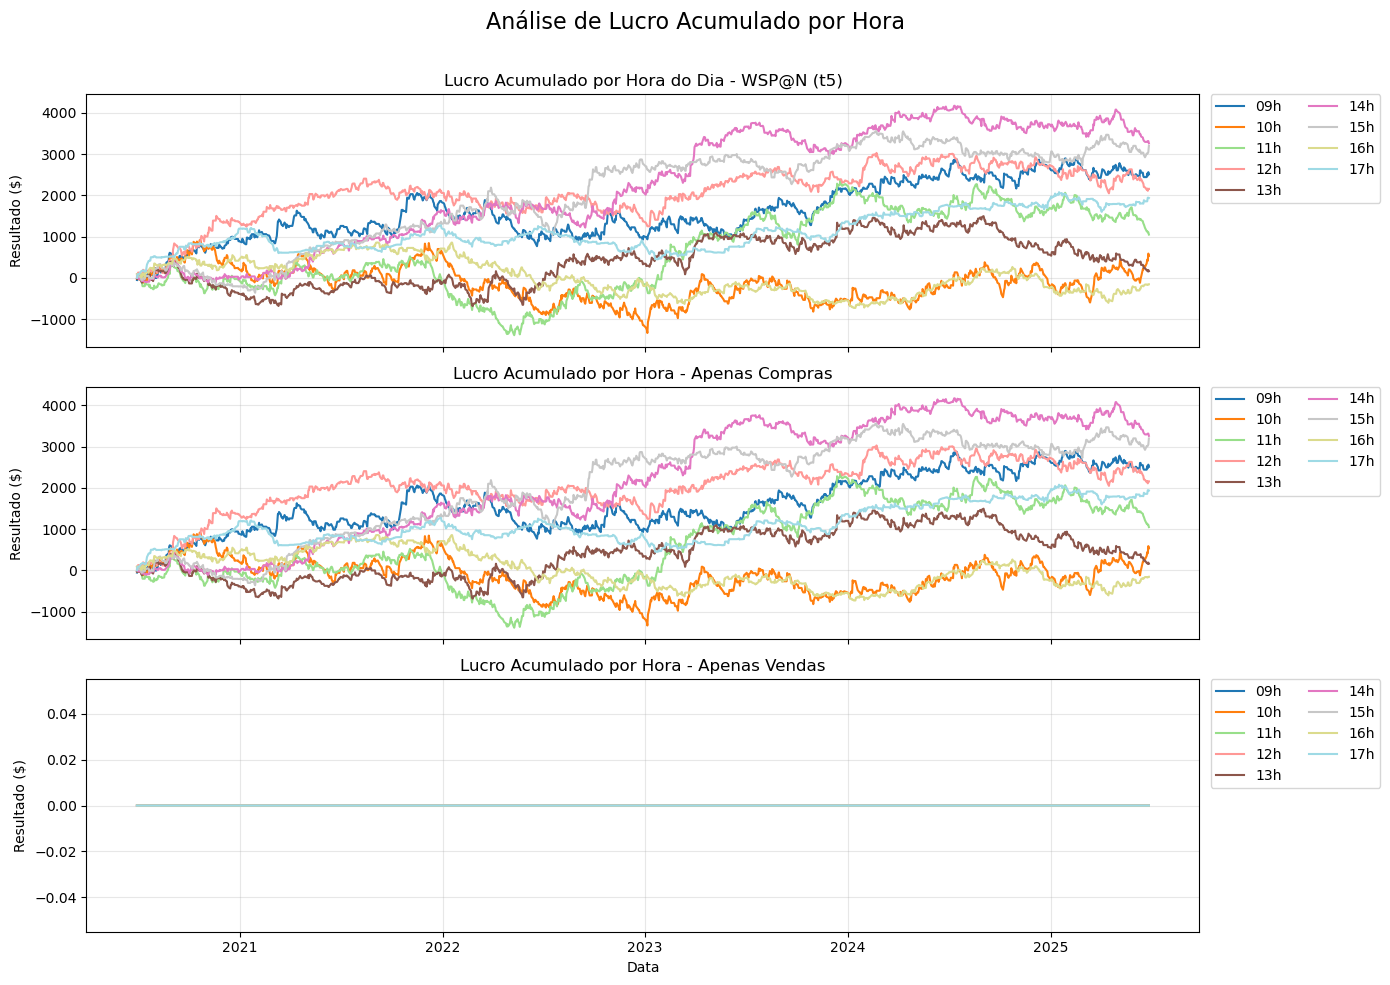

In [31]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

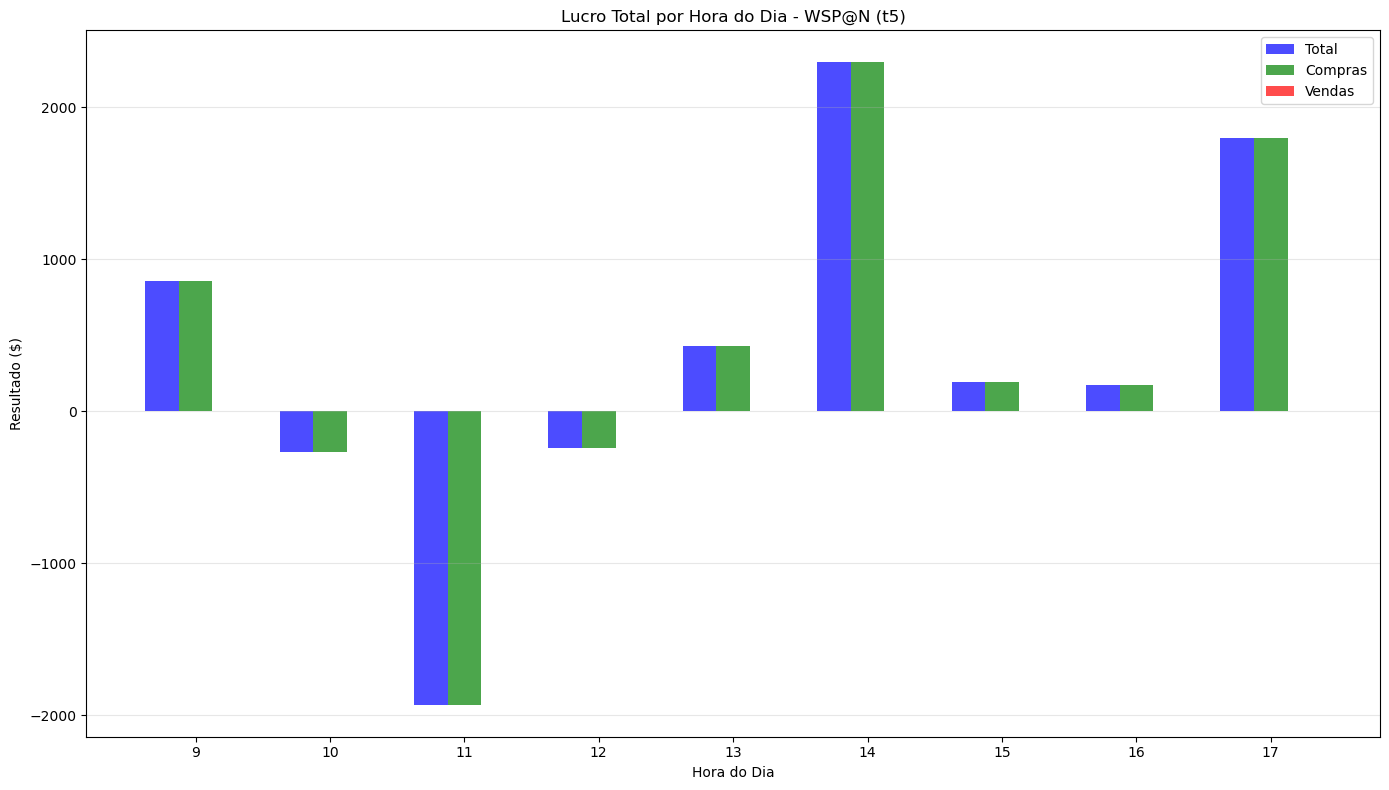

In [25]:
bt.plot_profit_by_hour()

# Otimização

In [158]:
metrics

{'total_return': 349825.0,
 'total_trades': 19190,
 'win_trades': 7859,
 'loss_trades': 11285,
 'win_rate': 0.4095362167795727,
 'tp_rate': 0.06175091193329859,
 'sl_rate': 0.47170401250651384,
 'time_exit_rate': 0.4665450755601876,
 'profit_factor': 1.2336442356178474,
 'max_drawdown': 1.0684931506849316,
 'max_drawdown_value': 20682.0,
 'max_time_underwater': 27241.0,
 'underwater_rate': 0.976249427725196,
 'sharpe_ratio': 1.3473779398793917,
 'sortino_ratio': 1086.439815934077,
 'calmar_ratio': 16.914466686007156,
 'avg_win': 235.02735717012342,
 'avg_loss': 132.67656180770936,
 'win_loss_ratio': 1.7714308689333764,
 'expectancy': 17.911510065494795}

In [32]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WSP@N'
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2019-01-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_float('sl', 1.0, 36.0),
        tp = trial.suggest_float('tp', 1.0, 36.0),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    BB_LENGTH = trial.suggest_int('BB_LENGTH', 4, 9)
    STD = trial.suggest_float('STD', 0.8, 2.0)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "bb_length": BB_LENGTH,
            "std": STD,
            'allowed_hours': [9,10,11,12,13,14,15,16],
            'position_type':'long'
        }
    )

    
    metrica = metrics['total_return']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [33]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=200)

[I 2025-06-28 21:54:12,261] A new study created in memory with name: no-name-92fe3bb3-079b-4c14-88c7-9b9b73c6f061
[I 2025-06-28 21:54:12,877] Trial 0 finished with value: 1771.58535972561 and parameters: {'sl': 8.841748539327247, 'tp': 34.81868618657846, 'BB_LENGTH': 5, 'STD': 1.6229973816511152}. Best is trial 0 with value: 1771.58535972561.
[I 2025-06-28 21:54:13,504] Trial 1 finished with value: 701.2201124960484 and parameters: {'sl': 28.328008419862275, 'tp': 24.184557102798976, 'BB_LENGTH': 6, 'STD': 1.8719276852224427}. Best is trial 0 with value: 1771.58535972561.
[I 2025-06-28 21:54:14,115] Trial 2 finished with value: -2427.4042059871317 and parameters: {'sl': 21.284567583576244, 'tp': 23.010385845302, 'BB_LENGTH': 8, 'STD': 1.632713297057224}. Best is trial 0 with value: 1771.58535972561.
[I 2025-06-28 21:54:14,725] Trial 3 finished with value: -278.8058449644959 and parameters: {'sl': 22.897235133881566, 'tp': 20.339046354916913, 'BB_LENGTH': 5, 'STD': 1.849825880249816}. B

[I 2025-06-28 21:54:33,682] Trial 33 finished with value: -2139.451871518864 and parameters: {'sl': 3.3276876363937165, 'tp': 29.05196808727644, 'BB_LENGTH': 4, 'STD': 1.1020819927566479}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:34,326] Trial 34 finished with value: 13002.27710476653 and parameters: {'sl': 10.627006298569132, 'tp': 35.89840345702838, 'BB_LENGTH': 4, 'STD': 0.9379969435781443}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:34,960] Trial 35 finished with value: 132.06718385814384 and parameters: {'sl': 25.18934317038146, 'tp': 35.54682219169034, 'BB_LENGTH': 5, 'STD': 1.964913141361336}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:35,576] Trial 36 finished with value: 2008.0171897725668 and parameters: {'sl': 18.280470233100104, 'tp': 22.338651347799704, 'BB_LENGTH': 5, 'STD': 0.9521714395840342}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:36,217] Trial 37 finished with

[I 2025-06-28 21:54:54,725] Trial 66 finished with value: 12402.991514112378 and parameters: {'sl': 7.55123605556845, 'tp': 33.26315491220525, 'BB_LENGTH': 5, 'STD': 0.806463794857332}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:55,372] Trial 67 finished with value: 10907.70183814822 and parameters: {'sl': 11.93247835206114, 'tp': 31.88770227047292, 'BB_LENGTH': 4, 'STD': 0.975295819525952}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:56,025] Trial 68 finished with value: 1973.761693729699 and parameters: {'sl': 5.214471337365611, 'tp': 33.329507189340546, 'BB_LENGTH': 4, 'STD': 0.9146414762995814}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:56,679] Trial 69 finished with value: 5158.829848533118 and parameters: {'sl': 9.409497252011986, 'tp': 28.18285416667798, 'BB_LENGTH': 5, 'STD': 0.846607500754644}. Best is trial 20 with value: 15937.611522063038.
[I 2025-06-28 21:54:57,360] Trial 70 finished with value: 

[I 2025-06-28 21:55:16,140] Trial 99 finished with value: 14545.976064031063 and parameters: {'sl': 14.010423317752728, 'tp': 31.029192790090455, 'BB_LENGTH': 4, 'STD': 0.9031916330546405}. Best is trial 77 with value: 19149.846382783915.
[I 2025-06-28 21:55:16,776] Trial 100 finished with value: 10115.04445248656 and parameters: {'sl': 23.018941470927004, 'tp': 35.2720007260142, 'BB_LENGTH': 4, 'STD': 0.8260762770650595}. Best is trial 77 with value: 19149.846382783915.
[I 2025-06-28 21:55:17,423] Trial 101 finished with value: 14409.641452346208 and parameters: {'sl': 10.112159424169057, 'tp': 32.804938533956594, 'BB_LENGTH': 4, 'STD': 0.8557147235424531}. Best is trial 77 with value: 19149.846382783915.
[I 2025-06-28 21:55:18,064] Trial 102 finished with value: 13585.67626588013 and parameters: {'sl': 16.58794160724908, 'tp': 32.18027640856148, 'BB_LENGTH': 4, 'STD': 0.828567162068341}. Best is trial 77 with value: 19149.846382783915.
[I 2025-06-28 21:55:18,704] Trial 103 finished w

[I 2025-06-28 21:55:37,611] Trial 132 finished with value: 13561.584696935228 and parameters: {'sl': 15.45812337343948, 'tp': 35.050281903054774, 'BB_LENGTH': 4, 'STD': 0.8418748690349448}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:55:38,248] Trial 133 finished with value: -45764.39370002137 and parameters: {'sl': 16.433527350277757, 'tp': 1.4276347672339682, 'BB_LENGTH': 4, 'STD': 0.8012310682954054}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:55:38,902] Trial 134 finished with value: 16490.891620282127 and parameters: {'sl': 12.83285173320434, 'tp': 34.43621471399891, 'BB_LENGTH': 4, 'STD': 0.9279578918036813}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:55:39,546] Trial 135 finished with value: 17043.189455174193 and parameters: {'sl': 13.848627898065203, 'tp': 33.351386677249124, 'BB_LENGTH': 4, 'STD': 0.8735733729028815}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:55:40,194] Trial 136 finis

[I 2025-06-28 21:55:58,803] Trial 165 finished with value: 13745.92071359497 and parameters: {'sl': 11.976659977166594, 'tp': 32.37682824103695, 'BB_LENGTH': 4, 'STD': 0.8735312391147037}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:55:59,454] Trial 166 finished with value: 6260.747769792717 and parameters: {'sl': 11.175955007601937, 'tp': 32.937607830393674, 'BB_LENGTH': 7, 'STD': 0.8449084527914766}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:56:00,091] Trial 167 finished with value: 17022.217850243025 and parameters: {'sl': 12.400102737794532, 'tp': 31.216256380610456, 'BB_LENGTH': 4, 'STD': 0.8202367288705256}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:56:00,732] Trial 168 finished with value: 18701.14735126112 and parameters: {'sl': 13.071451684494514, 'tp': 33.395490308548744, 'BB_LENGTH': 4, 'STD': 0.8601519897464138}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:56:01,366] Trial 169 finish

[I 2025-06-28 21:56:20,094] Trial 198 finished with value: 18706.877359059945 and parameters: {'sl': 12.351971697767661, 'tp': 33.683688015599195, 'BB_LENGTH': 4, 'STD': 0.8473097280962631}. Best is trial 105 with value: 22284.62190315142.
[I 2025-06-28 21:56:20,763] Trial 199 finished with value: 17876.02035219506 and parameters: {'sl': 11.581550773091676, 'tp': 33.86555474235721, 'BB_LENGTH': 4, 'STD': 0.866235046554547}. Best is trial 105 with value: 22284.62190315142.


In [28]:
study.best_params

{'sl': 10.00919937189865,
 'tp': 35.900633352764395,
 'BB_LENGTH': 6,
 'STD': 1.2158255052618194}

In [35]:
plot_param_importances(study)